In [24]:
import torch

In [25]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [26]:
x.requires_grad = True
x.grad

In [27]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [28]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [29]:
x.grad == 4 * x

tensor([True, True, True, True])

In [30]:
x.grad.zero_()
y = x.sum()
print(y)
y.backward()
x.grad

tensor(6., grad_fn=<SumBackward0>)


tensor([1., 1., 1., 1.])

In [31]:
x.grad.zero_()
y =  x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [32]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [33]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [34]:
a =  torch.randn(size = (), requires_grad = True)
b = f(a)
b.backward()
a.grad == b / a

tensor(True)

In [35]:
def f(a):
    return torch.sin(a)

In [36]:
import matplotlib.pyplot as plt

In [37]:
x = torch.linspace(-torch.pi, torch.pi, 100, requires_grad = True)
x

tensor([-3.1416, -3.0781, -3.0147, -2.9512, -2.8877, -2.8243, -2.7608, -2.6973,
        -2.6339, -2.5704, -2.5069, -2.4435, -2.3800, -2.3165, -2.2531, -2.1896,
        -2.1261, -2.0627, -1.9992, -1.9357, -1.8723, -1.8088, -1.7453, -1.6819,
        -1.6184, -1.5549, -1.4915, -1.4280, -1.3645, -1.3011, -1.2376, -1.1741,
        -1.1107, -1.0472, -0.9837, -0.9203, -0.8568, -0.7933, -0.7299, -0.6664,
        -0.6029, -0.5395, -0.4760, -0.4125, -0.3491, -0.2856, -0.2221, -0.1587,
        -0.0952, -0.0317,  0.0317,  0.0952,  0.1587,  0.2221,  0.2856,  0.3491,
         0.4125,  0.4760,  0.5395,  0.6029,  0.6664,  0.7299,  0.7933,  0.8568,
         0.9203,  0.9837,  1.0472,  1.1107,  1.1741,  1.2376,  1.3011,  1.3645,
         1.4280,  1.4915,  1.5549,  1.6184,  1.6819,  1.7453,  1.8088,  1.8723,
         1.9357,  1.9992,  2.0627,  2.1261,  2.1896,  2.2531,  2.3165,  2.3800,
         2.4435,  2.5069,  2.5704,  2.6339,  2.6973,  2.7608,  2.8243,  2.8877,
         2.9512,  3.0147,  3.0781,  3.14

In [38]:
y = f(x)

In [39]:
y.backward(torch.ones_like(x))
x.grad

tensor([-1.0000, -0.9980, -0.9920, -0.9819, -0.9679, -0.9501, -0.9284, -0.9029,
        -0.8738, -0.8413, -0.8053, -0.7660, -0.7237, -0.6785, -0.6306, -0.5801,
        -0.5272, -0.4723, -0.4154, -0.3569, -0.2969, -0.2358, -0.1736, -0.1108,
        -0.0476,  0.0159,  0.0792,  0.1423,  0.2048,  0.2665,  0.3271,  0.3863,
         0.4441,  0.5000,  0.5539,  0.6056,  0.6549,  0.7015,  0.7453,  0.7861,
         0.8237,  0.8580,  0.8888,  0.9161,  0.9397,  0.9595,  0.9754,  0.9874,
         0.9955,  0.9995,  0.9995,  0.9955,  0.9874,  0.9754,  0.9595,  0.9397,
         0.9161,  0.8888,  0.8580,  0.8237,  0.7861,  0.7453,  0.7015,  0.6549,
         0.6056,  0.5539,  0.5000,  0.4441,  0.3863,  0.3271,  0.2665,  0.2048,
         0.1423,  0.0792,  0.0159, -0.0476, -0.1108, -0.1736, -0.2358, -0.2969,
        -0.3569, -0.4154, -0.4723, -0.5272, -0.5801, -0.6306, -0.6785, -0.7237,
        -0.7660, -0.8053, -0.8413, -0.8738, -0.9029, -0.9284, -0.9501, -0.9679,
        -0.9819, -0.9920, -0.9980, -1.00

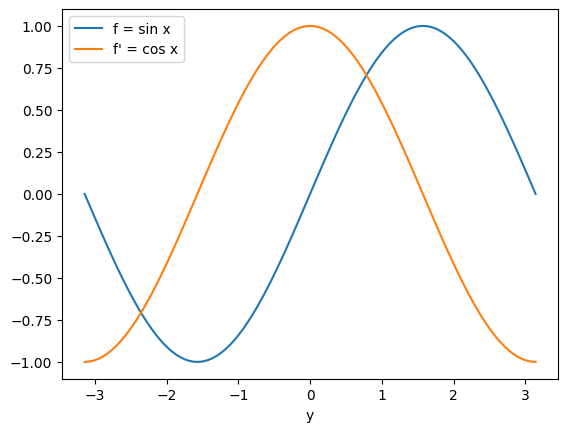

In [40]:
plt.plot(x.detach(), y.detach(), label = "f = sin x")
plt.plot(x.detach(), x.grad, label = "f' = cos x")
plt.xlabel("x")
plt.xlabel("y")
plt.legend()
plt.show()